# One step of learning

In [1]:
import torch

In [2]:
x = torch.rand(3)
y_true = torch.tensor(data=[1.])
x

tensor([0.3424, 0.5444, 0.9724])

In [3]:
# Create X and b
w = torch.randn(size=(3, 1), requires_grad=True)
# Requires_grad means that we will count gradients for this tensors
b = torch.zeros(1, requires_grad=True)
w

tensor([[-2.2227],
        [-0.9201],
        [-0.0446]], requires_grad=True)

In [4]:
# Calculate sigmoid for sample
torch.sigmoid(input=torch.tensor(data=[1, 0, -1]))

tensor([0.7311, 0.5000, 0.2689])

In [5]:
# Make prediction
y_pred = torch.sigmoid(x @ w + b)
y_pred

tensor([0.2133], grad_fn=<SigmoidBackward0>)

In [6]:
# Calculate loss function
loss = ((y_true - y_pred) ** 2).sum()
loss

tensor(0.6190, grad_fn=<SumBackward0>)

In [7]:
# Before .backward()
print(w.grad)
print(b.grad)

None
None


In [8]:
# Calculates gradient of loss
loss.backward()

print(w.grad)  # dl/dw
print()
print(b.grad)  # dl/db

tensor([[-0.0904],
        [-0.1437],
        [-0.2567]])

tensor([-0.2640])


In [ ]:
# Make step of gradient descent
print(f'W before: {w}')
print(f'b before: {b}')
print()

with torch.no_grad():  # Disable gradient calculations
    w -= w.grad
    b -= b.grad  # -= doesn't change current variable, but creates copy
    
print(f'W after: {w}')
print(f'b after: {b}')

In [9]:
# In PyTorch we have to make gradients empty manually!
w.grad.zero_()  # Inplace
b.grad.zero_()

tensor([0.])

# Activation and Loss functions

In [10]:
vector = torch.tensor([1., -0.5, 3., -2.])
print(
    f'Sigmoid:\n{torch.sigmoid(vector)}',
    f'Tanh:\n{torch.tanh(vector)}',
    f'ReLU:\n{torch.relu(vector)}',
    f'Softmax:\n{torch.softmax(vector, 0)}',
    f'Log_Softmax:\n{torch.log_softmax(vector, 0)}',
    sep='\n\n'
)

Sigmoid:
tensor([0.7311, 0.3775, 0.9526, 0.1192])

Tanh:
tensor([ 0.7616, -0.4621,  0.9951, -0.9640])

ReLU:
tensor([1., 0., 3., 0.])

Softmax:
tensor([0.1154, 0.0258, 0.8530, 0.0057])

Log_Softmax:
tensor([-2.1589, -3.6589, -0.1589, -5.1589])


In [13]:
# Loss functions

# MSE
y_true_reg = torch.tensor([1., -1., 2.])
y_pred_reg = torch.tensor([0.8, -0.2, 2.5])

# Cross-entropy
y_pred_clf_scores = torch.tensor([
    [10., 1., -2.5],
    [8., 2., 10.], 
    [0., 28., 1.]
])
y_true_clf_probs = torch.tensor([
    [1., 0., 0.],
    [0., 0., 1.],
    [0., 1., 0.]
])

# Negative loss likelihood
y_pred_clf_log_probs = torch.tensor([
    [0.8, 0.1, 0.1],
    [0.4, 0.1, 0.5],
    [0., 0.98, 0.02]
])
y_true_clf_class = torch.tensor([0, 2, 1])



# Function-instances of the classes
mse_loss_func = torch.nn.MSELoss()
ce_loss_func = torch.nn.CrossEntropyLoss()
nll_loss_func = torch.nn.NLLLoss()

print(
    f'MSE: {mse_loss_func(y_pred_reg, y_true_reg)}',
    f'CE: {ce_loss_func(y_pred_clf_scores, y_true_clf_probs)}',
    f'NLL: {nll_loss_func(y_pred_clf_log_probs, y_true_clf_class)}',
    sep='\n\n'
)

MSE: 0.3100000321865082

CE: 0.042450178414583206

NLL: -0.7599999904632568


# Neural network training

In [14]:
class MyLinear(torch.nn.Module):
    def __init__(self, in_features, out_features):
        """
        Initialize layer of NN
        """
        super().__init__()
        self.weight = torch.nn.Parameter(torch.randn(in_features, out_features))
        self.bias = torch.nn.Parameter(torch.zeros(out_features))
        
    def forward(self, input):
        """
        Gets data in input and Returns preprocessed data
        """
        return (input @ self.weight) + self.bias

In [17]:
linear_layer = torch.nn.Linear(in_features=2, out_features=3)
x = torch.rand(size=(2,))
linear_layer(x)

tensor([ 0.1187, -0.0155, -0.4338], grad_fn=<AddBackward0>)

In [18]:
n = 5  # Intput neurons
k = 2  # Output neurons

batch_size = 10  # How many examples do we calculate gradients at a time

x = torch.rand(batch_size, n)
y_true = torch.randint

# Two layers network
hidden_size = 5  # Shape of hidden layer
linear_layer_1 = torch.nn.Linear(in_features=n, out_features=hidden_size)
activation_1 = torch.nn.Tanh()
linear_layer_2 = torch.nn.Linear(in_features=hidden_size, out_features=k)
activation_2 = torch.nn.LogSoftmax(dim=1)  # Dim specifies on dimension

# Make prediction without wrapper

# y_pred = activation_2(
#     linear_layer_2(
#         activation_1(
#             linear_layer_1(x)
#         )
#     )
# )

model = torch.nn.Sequential(
    linear_layer_1,
    activation_1,
    linear_layer_2, 
    activation_2
)

model(x)

tensor([[-0.9618, -0.4816],
        [-0.8057, -0.5920],
        [-0.9183, -0.5095],
        [-0.8804, -0.5355],
        [-0.8859, -0.5316],
        [-0.9073, -0.5169],
        [-1.0083, -0.4539],
        [-0.9606, -0.4823],
        [-0.8241, -0.5774],
        [-0.9920, -0.4634]], grad_fn=<LogSoftmaxBackward0>)

In [19]:
# Description of the model
model

Sequential(
  (0): Linear(in_features=5, out_features=5, bias=True)
  (1): Tanh()
  (2): Linear(in_features=5, out_features=2, bias=True)
  (3): LogSoftmax(dim=1)
)

In [24]:
# Beautiful view of Sequential
from collections import OrderedDict

model = torch.nn.Sequential(
    OrderedDict([
        ('linear_layer_1', torch.nn.Linear(n, hidden_size)),
        ('activation_1', torch.nn.Tanh()),
        ('linear_layer_2', torch.nn.Linear(hidden_size, k)),
        ('log_softmax', torch.nn.LogSoftmax(dim=1))
    ])
)

print(model(x), end='\n\n')
model

tensor([[-1.0420, -0.4350],
        [-1.1425, -0.3842],
        [-1.0585, -0.4262],
        [-1.1850, -0.3649],
        [-1.0650, -0.4227],
        [-1.0039, -0.4564],
        [-1.1407, -0.3851],
        [-0.9961, -0.4610],
        [-1.1176, -0.3961],
        [-1.1797, -0.3673]], grad_fn=<LogSoftmaxBackward0>)



Sequential(
  (linear_layer_1): Linear(in_features=5, out_features=5, bias=True)
  (activation_1): Tanh()
  (linear_layer_2): Linear(in_features=5, out_features=2, bias=True)
  (log_softmax): LogSoftmax(dim=1)
)

# Train model on real data

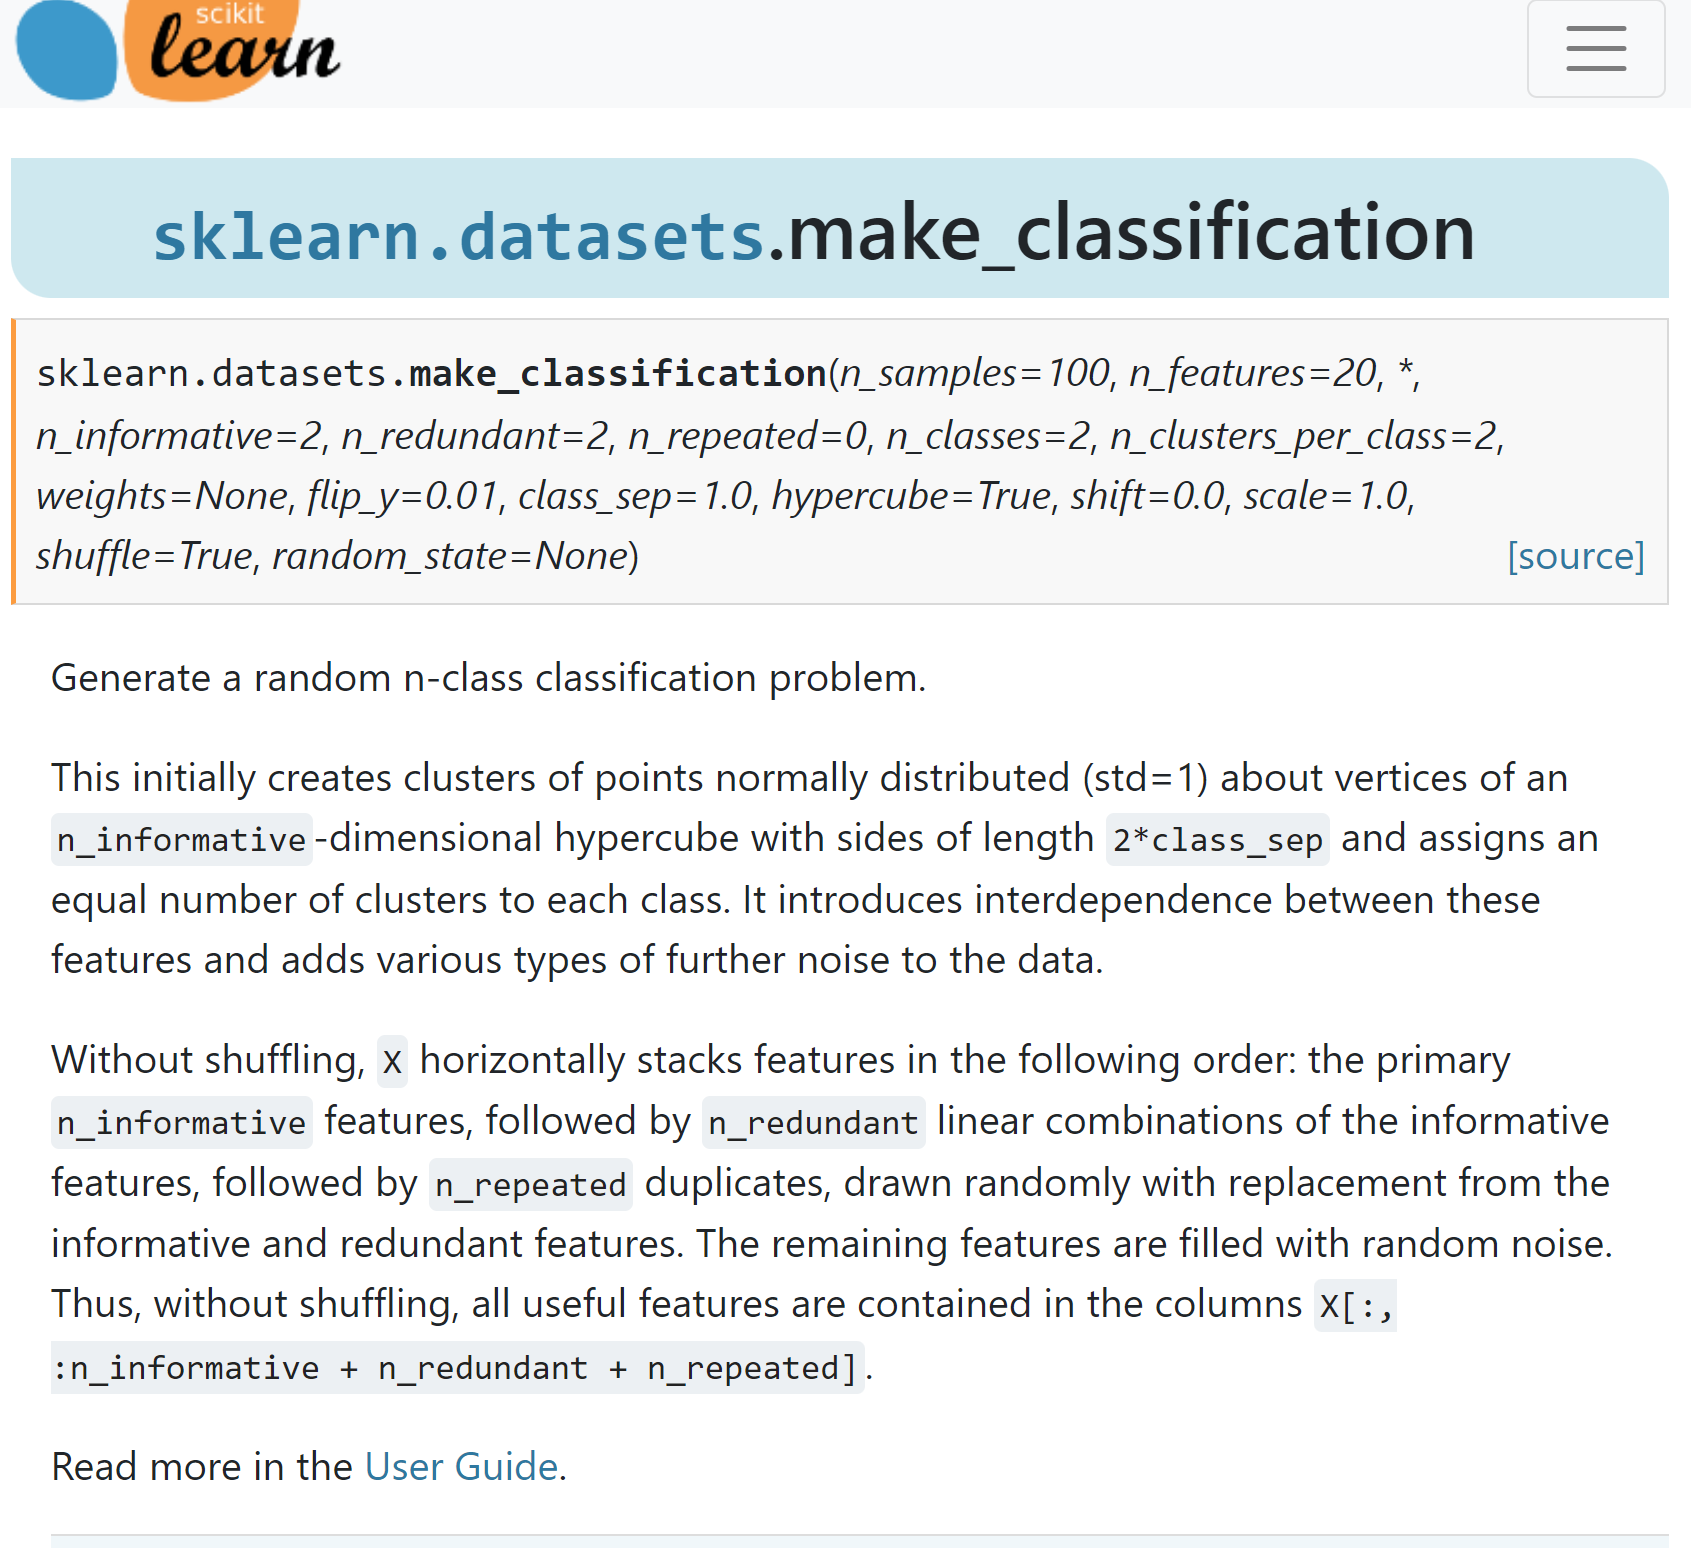

In [27]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=2,
    
    n_informative=2,
    n_redundant=0,
    n_repeated=0
)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

X.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [30]:
# 2 Classes
y.min(), y.max()

(tensor(0), tensor(1))

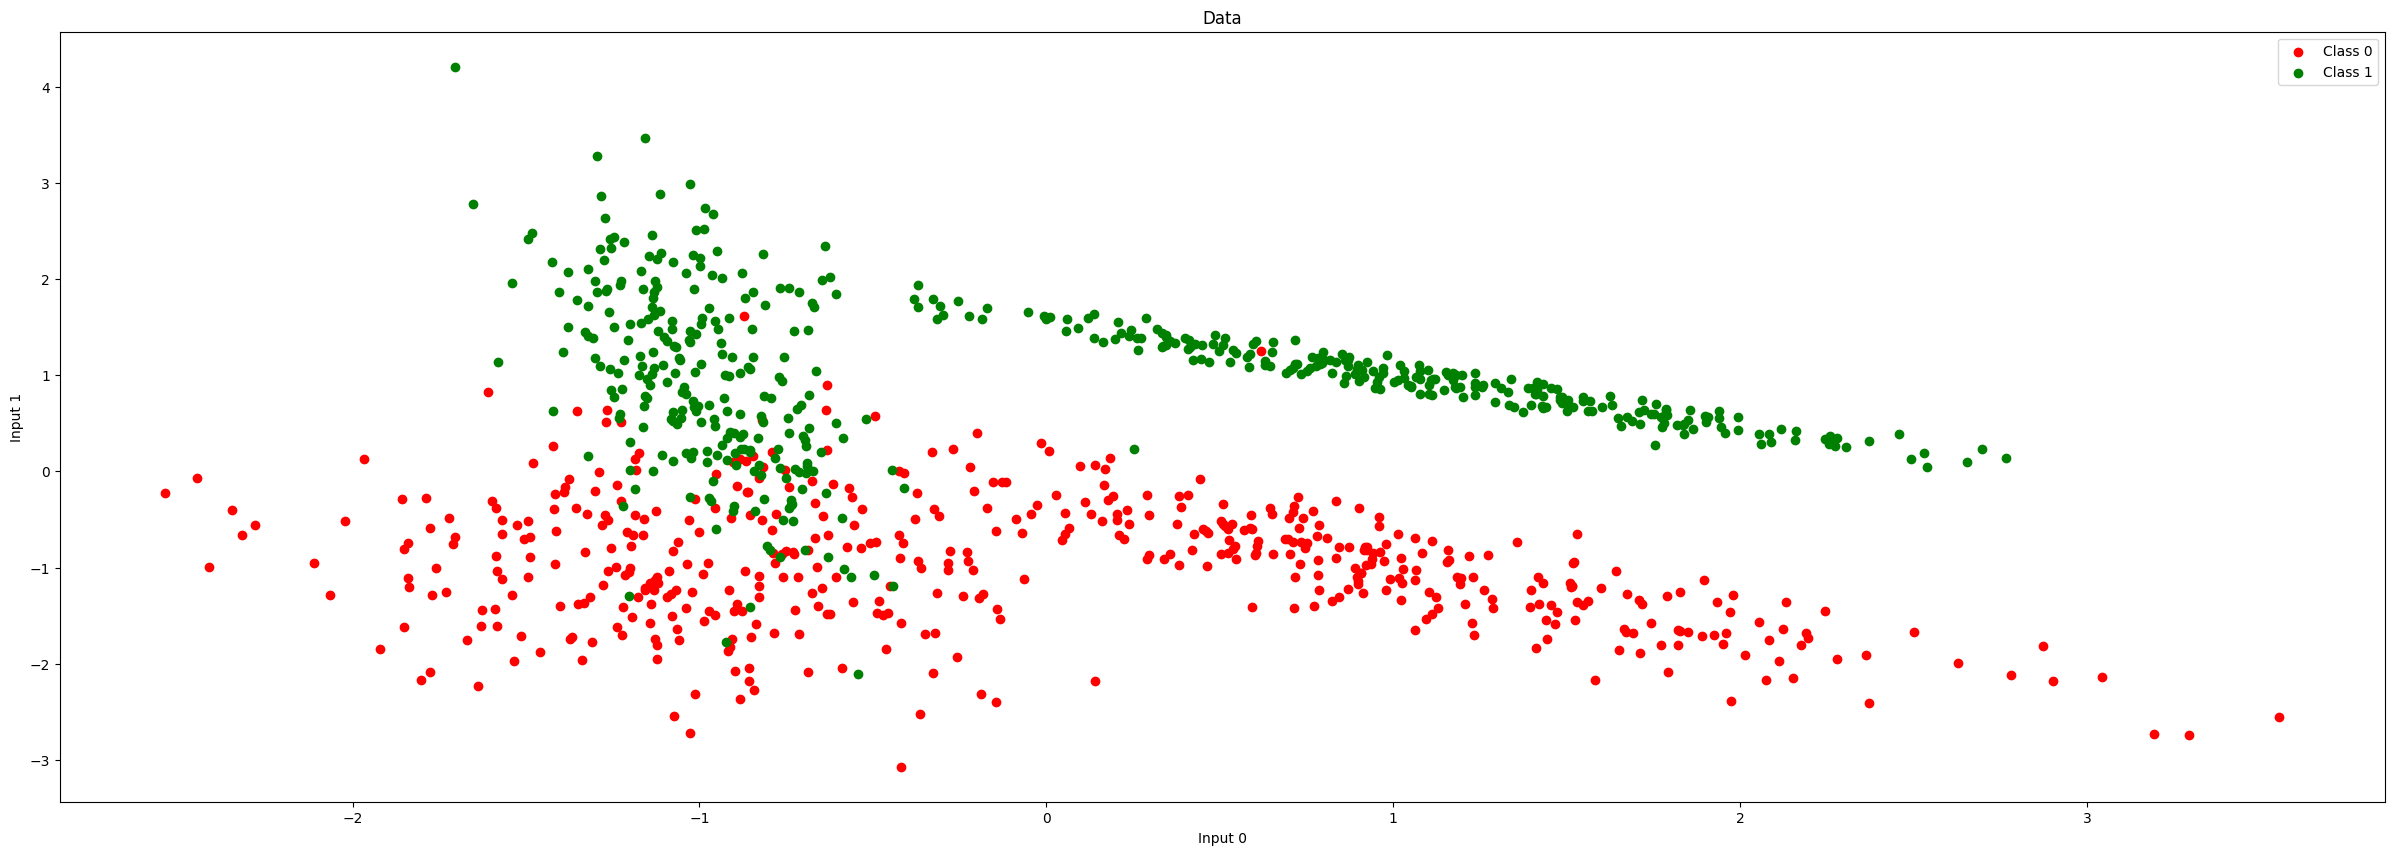

In [34]:
# Visualize the data
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30, 10))
colors = ['red', 'green']
for target in range(2):
    plt.scatter(X[y == target, 0], X[y == target, 1], label=f'Class {target}', c=colors[target])

plt.title('Data')
plt.xlabel('Input 0')
plt.ylabel('Input 1')
plt.legend()
plt.show();

In [36]:
# Make grid
xy_min, xy_max = -4, 4
grid_size = 120
grid = torch.linspace(xy_min, xy_max, grid_size, dtype=torch.float32)
grid_x_1, grid_x_2 = torch.meshgrid(grid, grid, indexing='ij')
grid = torch.stack([grid_x_1.reshape(-1), grid_x_2.reshape(-1)], dim=1)
print(grid.shape, grid.dtype)

torch.Size([14400, 2]) torch.float32


In [39]:
from collections import OrderedDict

model = torch.nn.Sequential(
    OrderedDict([
        ('linear_layer_1', torch.nn.Linear(2, 4)),
        ('activation_1', torch.nn.ReLU()),
        ('linear_layer_2', torch.nn.Linear(4, 2)),
        ('log_softmax', torch.nn.LogSoftmax(dim=1))
    ])
)

model

Sequential(
  (linear_layer_1): Linear(in_features=2, out_features=4, bias=True)
  (activation_1): ReLU()
  (linear_layer_2): Linear(in_features=4, out_features=2, bias=True)
  (log_softmax): LogSoftmax(dim=1)
)

In [40]:
# Optimizer - Thing that automatically make gradient descent
optimizer = torch.optim.SGD(
    model.parameters(),
    lr=1
)

# optimizer.step() <--> w -= lr * w.grad
# optimizer.zero_grad() to clean gradients